In [ ]:
"""\
# Jesús Bautista Villar <jesbauti20@gmail.com>
- Source seeking simulations (centralized computing) -
"""

In [ ]:
# If executed from Google Colab --------------------------------------------------------
# !git clone link_to_the_repo
# !rsync -a source_seeking_distr/ .
# !rm -r source_seeking_distr

# If you want to use latex with matplotlib ---------------------------------------------
# !apt install -y texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super
# !pip install -y latex

In [1]:
# Import standard libraries
import os
import random

# Third-Party Libraries
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from IPython.display import HTML
from matplotlib.animation import PillowWriter

# -------------------------------------------------------------------------------------
# Import from the Swarm Systems Lab Simulator

# Tell matplotlib to use latex
from ssl_simulator.visualization import set_paper_parameters
set_paper_parameters(fontsize=15)

# Main utility functions used along the notebook
from ssl_simulator import SimulationEngine, create_dir, load_sim, add_src_to_path
from ssl_simulator.math import XY_distrib, gen_Z_random, gen_Z_split
from ssl_simulator.robot_models import SingleIntegrator, Unicycle2D

from ssl_simulator.components.scalar_fields import SigmaGauss, SigmaNonconvex, SigmaFract
from ssl_simulator.components.network import Graph

# -------------------------------------------------------------------------------------
# Import custom functions and classes (src in path is requiered)
add_src_to_path()

from sim_core.controllers import SourceSeekingSI, SourceSeekingUny
from sim_core.visualization import PlotterSimBasicSI, PlotterSimBasicUny, PlotterSimData2Uny

# -------------------------------------------------------------------------------------
# Define constants for file paths
OUTPUT_DIR = os.path.join("..", "output")
SIMDATA_FILE1 = os.path.join(OUTPUT_DIR, "data1.csv")
SIMDATA_FILE2 = os.path.join(OUTPUT_DIR, "data2.csv")
SIMDATA_FILE_GAME = os.path.join(OUTPUT_DIR, "data_game.csv")
create_dir(OUTPUT_DIR)

The directory '../output' already exists!


# Single integrator dynamics

In [ ]:
# ---- SI simulation (setup)

# Define the initial state
N = 50

pc = np.array([-45,-50])
p = XY_distrib(N, pc, np.array([2,7]))
x0 = [p]

# Define the graph (Z doesn't matter in centralized)
Z = gen_Z_split(N, 1, int(N**(1.98)))
graph = Graph(N, Z)

# Define the scalar field
k, mu, dev = 0.04, [40,40], 10
scalar_field = SigmaNonconvex(k=k, dev=dev, mu=mu)

# Controller settings
speed = 15

In [ ]:
# ---- SI simulation (run)

# Select and initialize the robot model and the controller
robot_model = SingleIntegrator(x0)

# Initialize the controller
controller = SourceSeekingSI(scalar_field=scalar_field, graph=graph, speed=speed)

# Then, construct the Simulator Engine
dt = 0.01
simulator = SimulationEngine(robot_model, controller, time_step=dt, log_filename=SIMDATA_FILE1)

# --------------------------------
# Run the simulation and save data
tf = 12
dt_sim = 0.5

rounds = 0
for it in np.arange(12/0.5): # TODO: better way of killing angents, just one round
    simulator.run(dt_sim)
    graph.kill_agents(random.choice(range(N)))

# simulator.run(tf)
# --------------------------------

In [ ]:
# ---- SI simulation (plot)

# Load previously saved simulation data from the specified file
simulation_data = load_sim(SIMDATA_FILE1, debug=True)

# Initialize the plotter with the loaded simulation data
plotter = PlotterSimBasicSI(simulation_data, scalar_field, 
                         dpi=150, figsize=(6,5), xlims=[-50,80], ylims=[-60,70])

# Generate and display the plot
ax = plotter.plot(alpha=1, num_patches=6)

plt.show()

# Unicycle dynamics

## Static source (basic simulation just for testing)

In [ ]:
# ---- SI simulation (setup)

# Define the initial state
N = 20

pc, lims = np.array([60,60]), np.array([12,2])
p = XY_distrib(N, pc, lims)
speed = np.ones(N) * 6
theta = np.random.rand(N) * np.pi

x0 = [p, speed, theta]

# Define the graph (Z doesn't matter in centralized)
Z = gen_Z_random(N, rounds=3)
graph = Graph(N, Z)

# Define the scalar field
k, mu, dev = 0.04, [-40,-40], 10
scalar_field = SigmaNonconvex(k=k, dev=dev, mu=mu, a=[1,0], b=[0,1])

# Controller settings
kd = 1

In [ ]:
# ---- SI simulation (run)

# Select and initialize the robot model and the controller
robot_model = Unicycle2D(x0, omega_lims=[-1,1])

# Initialize the controller
controller = SourceSeekingUny(scalar_field=scalar_field, graph=graph, kd=kd)

# Then, construct the Simulator Engine
dt = 0.01
simulator = SimulationEngine(robot_model, controller, time_step=dt, log_filename=SIMDATA_FILE2)

# --------------------------------
# Run the simulation and save data
tf = 40

simulator.run(tf, eta=True)
# --------------------------------

In [ ]:
# ---- SI simulation (plot)

# Load previously saved simulation data from the specified file
simulation_data = load_sim(SIMDATA_FILE2, debug=True)

# Initialize the plotter with the loaded simulation data
plotter = PlotterSimBasicUny(simulation_data, scalar_field, 
                         dpi=150, figsize=(6,5), xlims=[-70,80], ylims=[-60,80],
                         size=1.5)

# Generate and display the plot
ax = plotter.plot(alpha=1, num_patches=2, lw=0.1)

plt.show()

## Moving source

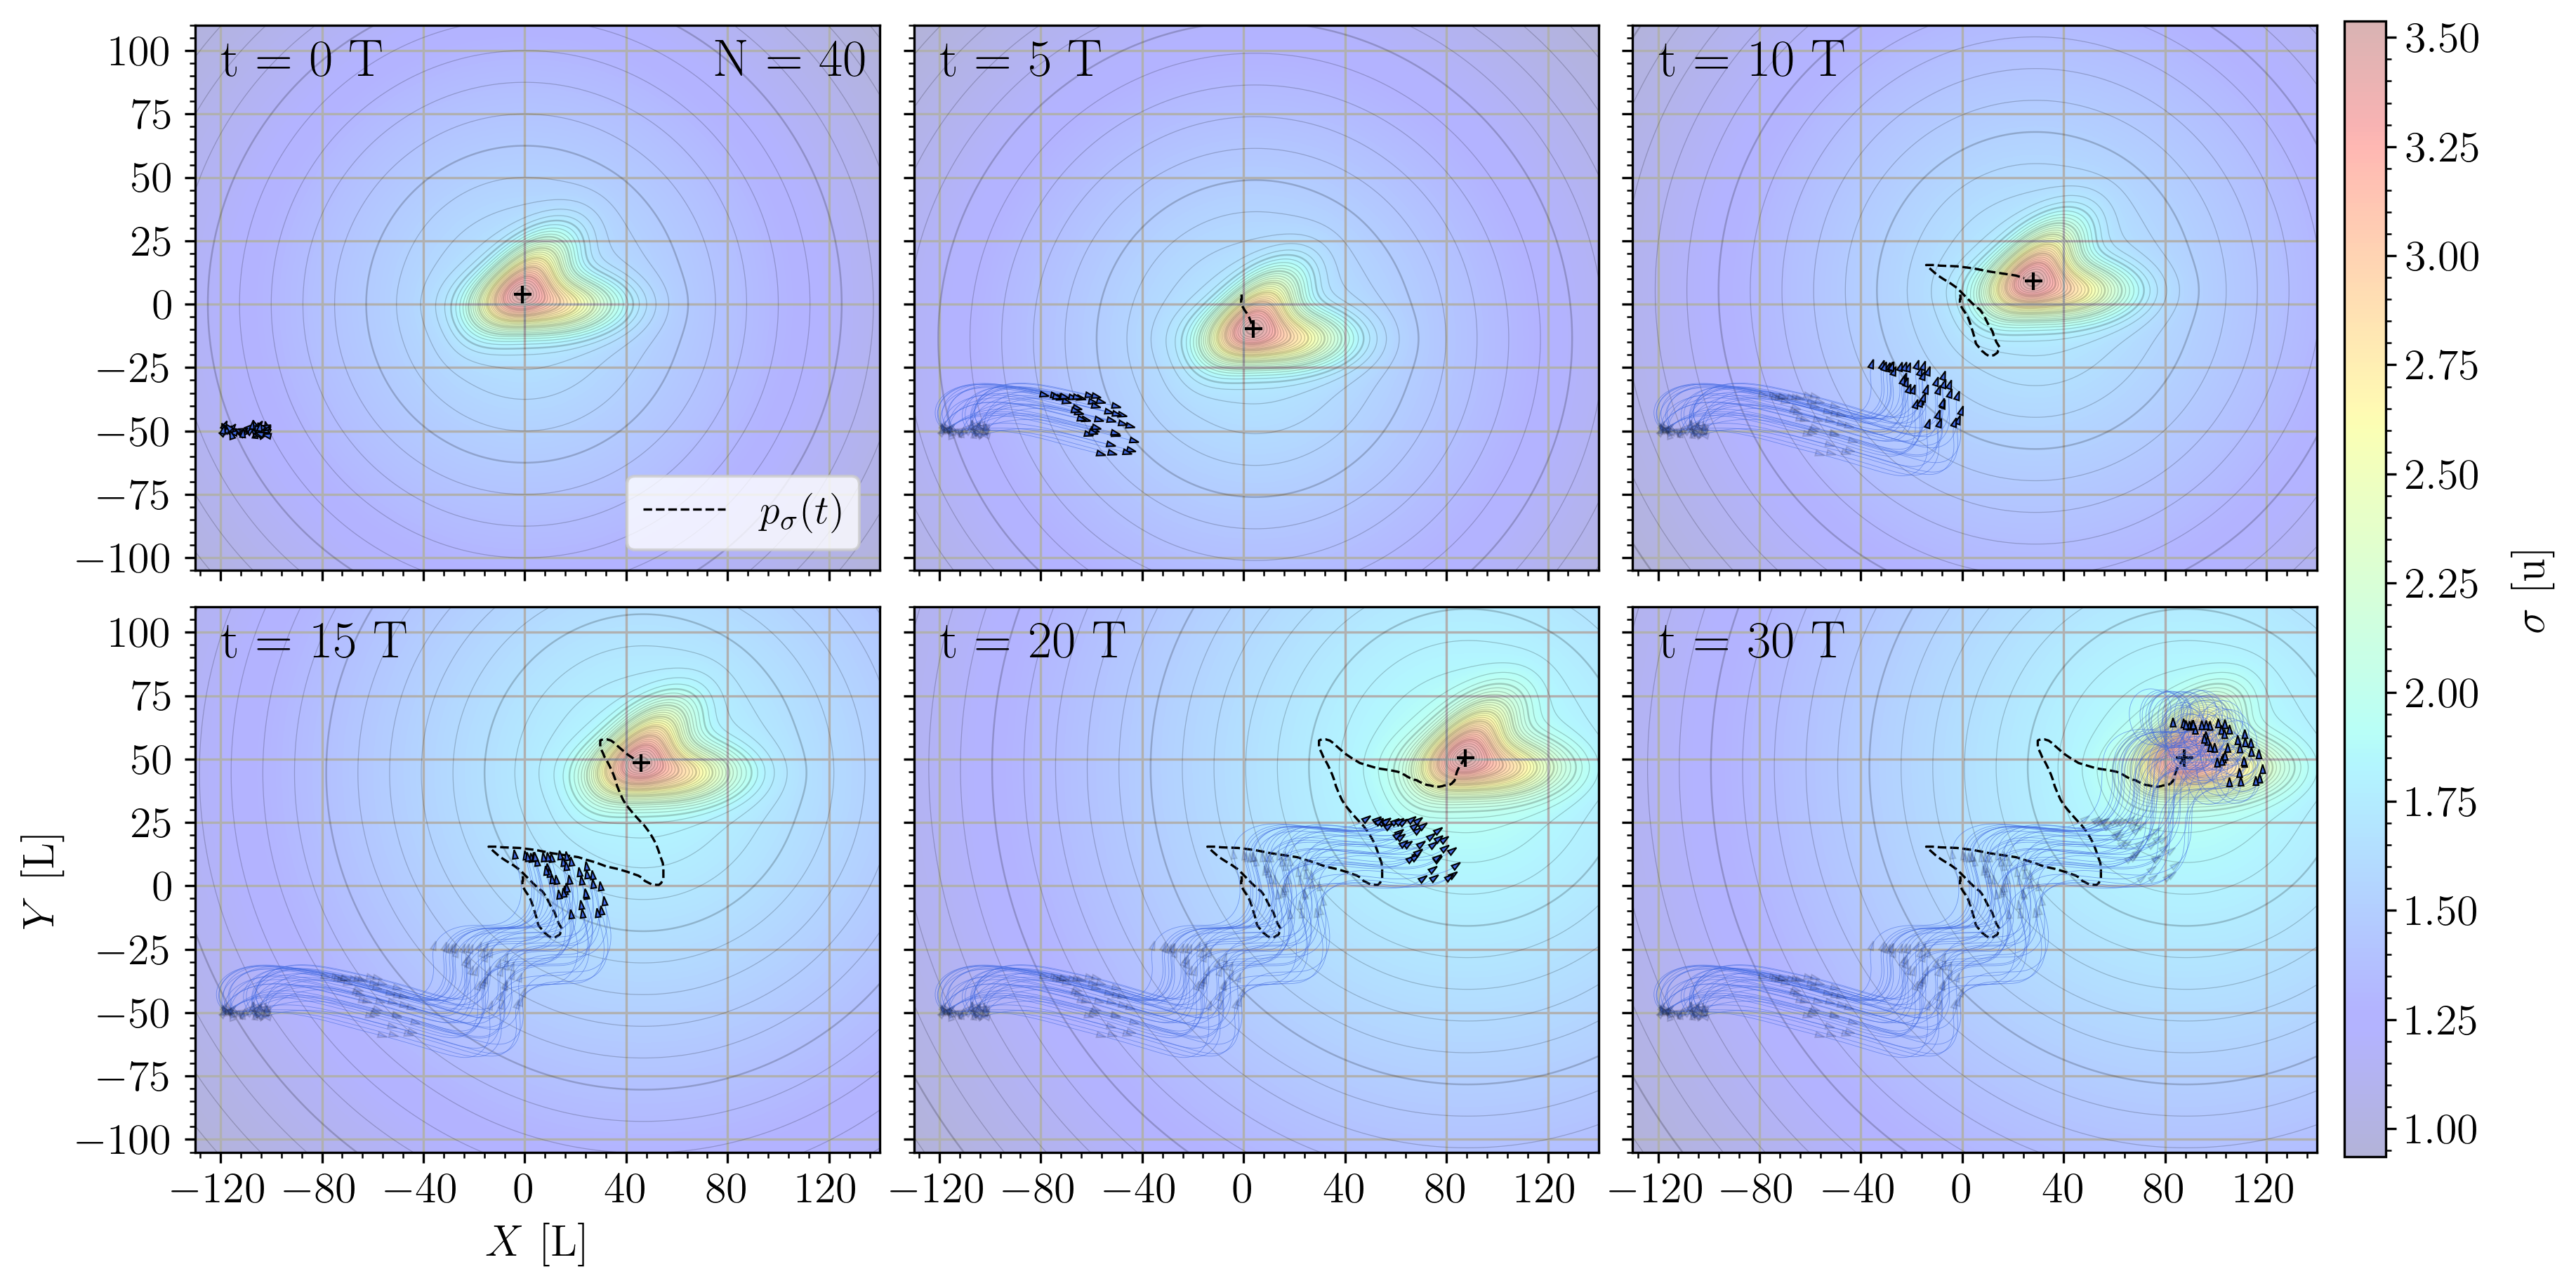

In [2]:
# ---- SI simulation (plot)

# Load previously saved simulation data from the specified file
simulation_data, settings = load_sim(SIMDATA_FILE_GAME, debug=False)

# Initialize the plotter with the loaded simulation data
plotter = PlotterSimData2Uny(simulation_data, settings, 
                         dpi=300, figsize=(13,7), xlims=[-130,140], ylims=[-105,110])

# Generate and display the plot
ax = plotter.draw(t_list=[0,5,10,15,20,30])

plt.show()